In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [16]:
import os
import ale_python_interface

path = os.path.join(os.path.abspath(os.path.curdir), '..', 'roms')

roms = os.listdir(path)

template = "{0:<20}{1:<10}{2:<10}"
print template.format('rom', 'lives', 'actions')
ale = ale_python_interface.ALEInterface()
for rom in roms:
    if rom.endswith('.bin'):
        # let's skip one rom...
        if '2' in rom:
            continue
        ale.loadROM(os.path.join(path, rom))
        num_actions = len(ale.getMinimalActionSet())
        lives = ale.lives()
        
        print template.format(rom[:-4], lives, num_actions)


rom                 lives     actions   
asterix             3         9         
bank_heist          5         18        
berzerk             3         18        
Bowling             0         6         
boxing              0         18        
breakout            5         6         
carnival            0         6         
centipede           3         18        
crazy_climber       5         9         
defender            3         18        
demon_attack        4         6         
double_dunk         0         18        
elevator_action     4         18        
fishing_derby       0         18        
freeway             0         3         
gopher              3         8         
gravitar            6         18        
hero                4         18        
ice_hockey          0         18        
jamesbond           6         18        
kangaroo            3         18        
krull               3         18        
kung_fu_master      4         14        
name_this_game  

In [13]:
import numpy as np
import codecs

txt = None
with open('dump.txt', 'r') as fin:
    txt = fin.readlines()[0]
    print len(txt)
    byte_str = codecs.decode(txt, 'hex_codec')
    print len(byte_str)

q = np.frombuffer(byte_str, dtype='uint8').reshape(()
print q.reshape((190, ))

134400
67200


ValueError: total size of new array must be unchanged

/Users/m12sl/Projects/deep_q_rl/deep_q_rl/../roms/demon_attack.bin
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[ 0  1  3  4 11 12]
False
(210, 160, 3)
(210, 160)
0 140


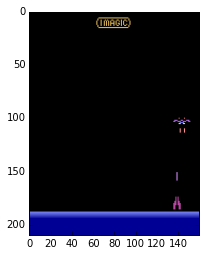

(210, 160)
0 220


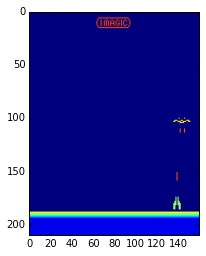

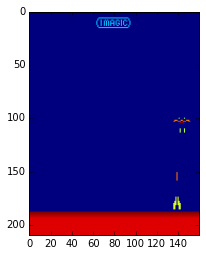

In [22]:
import cv2
path = os.path.join(os.path.abspath(os.path.curdir), '..', 'roms')

roms = os.listdir(path)

rom = os.path.join(path, roms[10])
print rom
ale = ale_python_interface.ALEInterface()
ale.loadROM(rom)

print ale.getLegalActionSet()
print ale.getMinimalActionSet()
print ale.game_over()

q = ale.getScreenRGB()
r = ale.getScreen().reshape(210, 160)

print q.shape

print r.shape

print np.min(r), np.max(r)

plt.imshow(q)
plt.show()


gray = np.dot(q[...,:3].astype('float'), [0.299, 0.587, 0.144]).astype('uint8')
print gray.shape
print np.min(gray), np.max(gray)

np.sum(np.abs(gray - r))

plt.imshow(gray)
plt.show()
plt.imshow(r)
plt.show()




